In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# import other libraries needed
import matplotlib as mpl
import matplotlib.pyplot as plt
# import the california housing dataset from sklearn
from sklearn.datasets import fetch_california_housing


### About the dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [4]:
# the dataset is loaded into 'housing' that has datatype = Bunch (Bunch is just like dictionary, actually an extension to dictionary, that allows values to be accessed either 
# by key bunch['key'] or attribute bunch.attribute_name)
housing = fetch_california_housing()
data = housing.data
columns = housing.feature_names
price = housing.target

In [5]:
# create a dataframe of housing dataset
df = pd.DataFrame(data = data, columns = columns)

In [6]:
# take a look at the first 5 rows of dataframe
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


We see that the target variable 'Price' is not included in the dataframe. So we add a new column for price.

In [7]:
df['Price'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Basic data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We observe there are no missing values in our dataset and all the attributes are numeric.

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

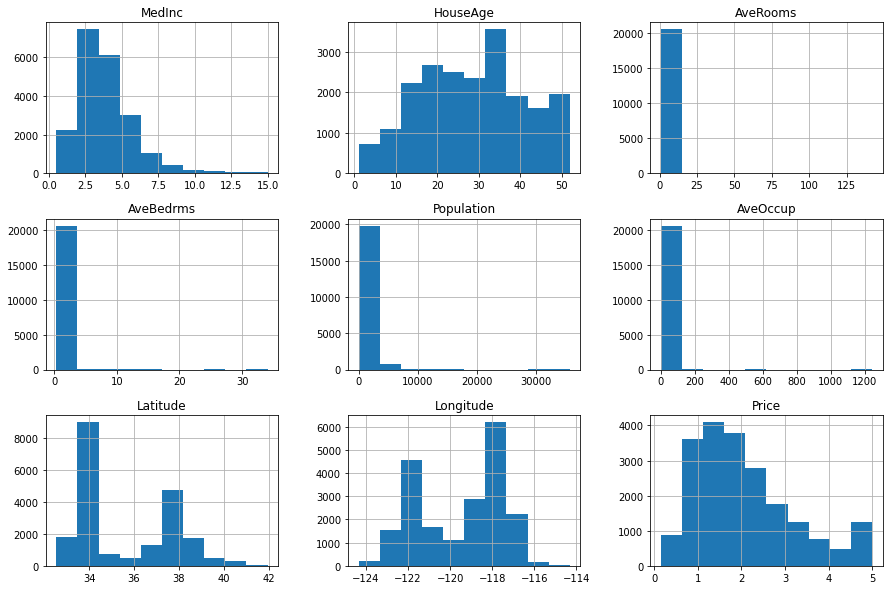

In [10]:
# create histogram of all the numeric attributes of the dataframe
# This is done using df.hist(), could also be done using matplotlib
df.hist(figsize=(15,10), bins = 10)

The median income does not seem to be true representative of the dollar value of the income. It has already been preprocessed to scale between a range of values (we can see min and max from df.describe for reference). Also, the target variable Price has also been scaled in the provided data.

### Train-test split
Don't do any further analysis before taking out the test set to prevent 'data snooping' bias. Your brain may catch any existing patterns in the data that may influence your choice of the machine learning models to make predictions.
So, take the test data and keep it aside!

Typically pick 20% random instances from the original dataset as your test set (or less if the dataset is quite large which in not the case here).

In [11]:
# we can use sklearn train_test_split but here we are defining our own function to do the train-test split
np.random.seed(42) # define a seed so that every time the function is called, same test set is generated
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
# call the function to get train_set and test_set
train_set, test_set = split_train_test(df,0.2)

In [13]:
# a simple example to understand what has been done in the function split_train_test()
ind = np.random.permutation(10)
print(ind)
test_ind = ind[:2]
print(test_ind)
train_ind = ind[2:]
print(train_ind)

[6 0 8 1 9 7 3 5 4 2]
[6 0]
[8 1 9 7 3 5 4 2]


In [14]:
# same thing using scikit-learn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

So far we have only done the train-test split on purely random basis and it is preferred when the data is large enough relative to number of attributes. If this is not the case then there is a risk of *sampling bias*.

#### To prevent sampling bias, we can use something called Stratified Sampling instead of random sampling of the test set. 
The population is divided into homogeneous groups called 'strata', and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population. We can use sklearn's StratifiedShuffleSplit in such cases wherever needed. 

### Data visualization

In [15]:
#we can create a copy of the train set to do some more exploration
df = train_set.copy()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

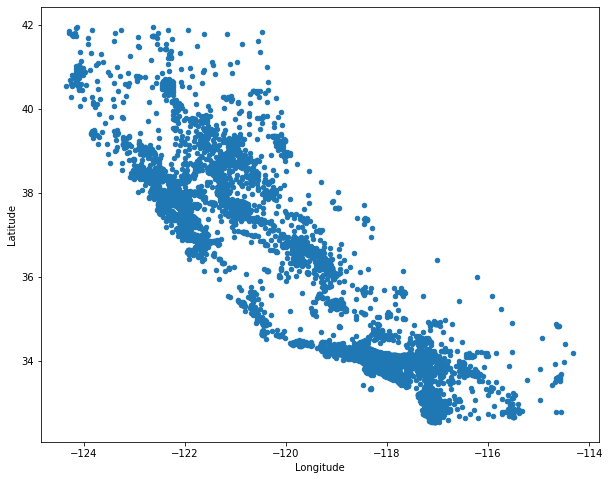

In [27]:
df.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(10,8))

It looks like a geographical map of California, but it is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points.

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

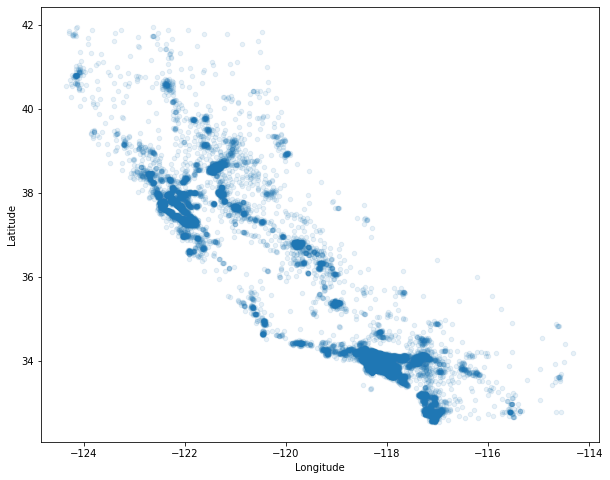

In [28]:
df.plot(kind='scatter', x='Longitude', y='Latitude', alpha = 0.1, figsize=(10,8))

To see more patterns based on other parameters, we can tweak the above plot as follows.
Set the radius of the scatterplot points according to the population column by specifying it in 's' parameter.
'c' parameter contains the values conditioned on which the color of the points is decided.

- The radius of the circle represents the district's population (option s)
- The color represents the price (option c)
- colormap used is 'jet' which ranges from blue (low prices) to red (high prices).

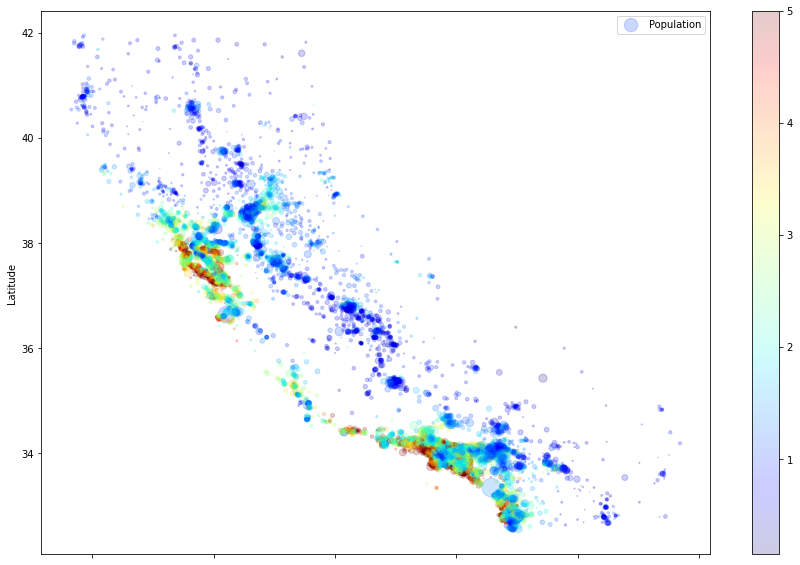

In [30]:
df.plot(kind='scatter',x='Longitude', y='Latitude', alpha=0.2, s=df['Population']/100, label = 'Population',
       figsize=(15,10), c=df['Price'], cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

The above plot tells us that the house prices are very much related to the location and to the population density. It can be observed that prices are usually higher near the ocean side (if that doesn't make sense, we can refer to map of California).

### Looking for correlations
We can find the Pearson correlation coefficient between every pair of attributes using *corr()* function.

In [35]:
corr_matrix = df.corr() # returns the correlation matrix in the form of a dataframe
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.121711,0.336013,-0.072550,0.004122,0.022061,-0.076571,-0.017040,0.690647
HouseAge,-0.121711,1.000000,-0.160892,-0.087983,-0.292283,0.016245,0.005296,-0.101818,0.103706
AveRooms,0.336013,-0.160892,1.000000,0.836163,-0.073733,-0.004922,0.110695,-0.029339,0.158485
AveBedrms,-0.072550,-0.087983,0.836163,1.000000,-0.071267,-0.006035,0.073161,0.016647,-0.051351
Population,0.004122,-0.292283,-0.073733,-0.071267,1.000000,0.072330,-0.102499,0.094276,-0.026032
AveOccup,0.022061,0.016245,-0.004922,-0.006035,0.072330,1.000000,0.005837,-0.000598,-0.022030
Latitude,-0.076571,0.005296,0.110695,0.073161,-0.102499,0.005837,1.000000,-0.924485,-0.142983
Longitude,-0.017040,-0.101818,-0.029339,0.016647,0.094276,-0.000598,-0.924485,1.000000,-0.046349
Price,0.690647,0.103706,0.158485,-0.051351,-0.026032,-0.022030,-0.142983,-0.046349,1.000000


Some things to note about correlation coefficient:
- The correlation coefficient ranges between -1 (strong negative correlation) and 1 (strong positive correlation).
- 0 means no correlation.
- The diagonal entries of the correlation matrix are 1 because each attribute is completely correlated with itself. <br> <br>
Now, we can see how much each attribute is correlated with the target attribute "Price".

In [36]:
print(type(corr_matrix)) # corr_matrix is a dataframe, so we can filter the correlation values for Price column
corr_matrix['Price'].sort_values(ascending=False) # sort the values in descending order (indices are sorted)


<class 'pandas.core.frame.DataFrame'>
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')


Price         1.000000
MedInc        0.690647
AveRooms      0.158485
HouseAge      0.103706
AveOccup     -0.022030
Population   -0.026032
Longitude    -0.046349
AveBedrms    -0.051351
Latitude     -0.142983
Name: Price, dtype: float64

<AxesSubplot:>

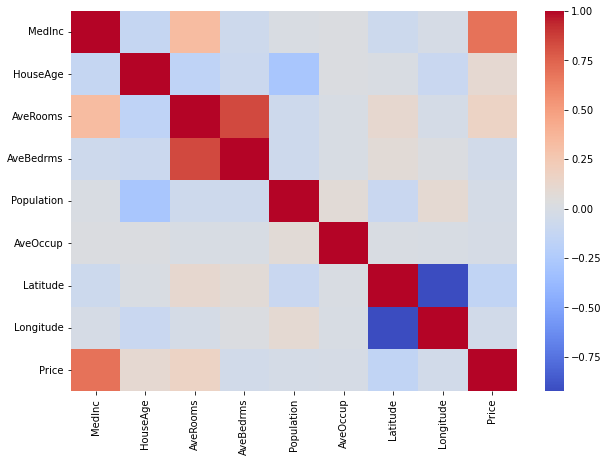

In [52]:
# we can use seaborn's heatmap plot to plot the correlation matrix
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, cmap='coolwarm')

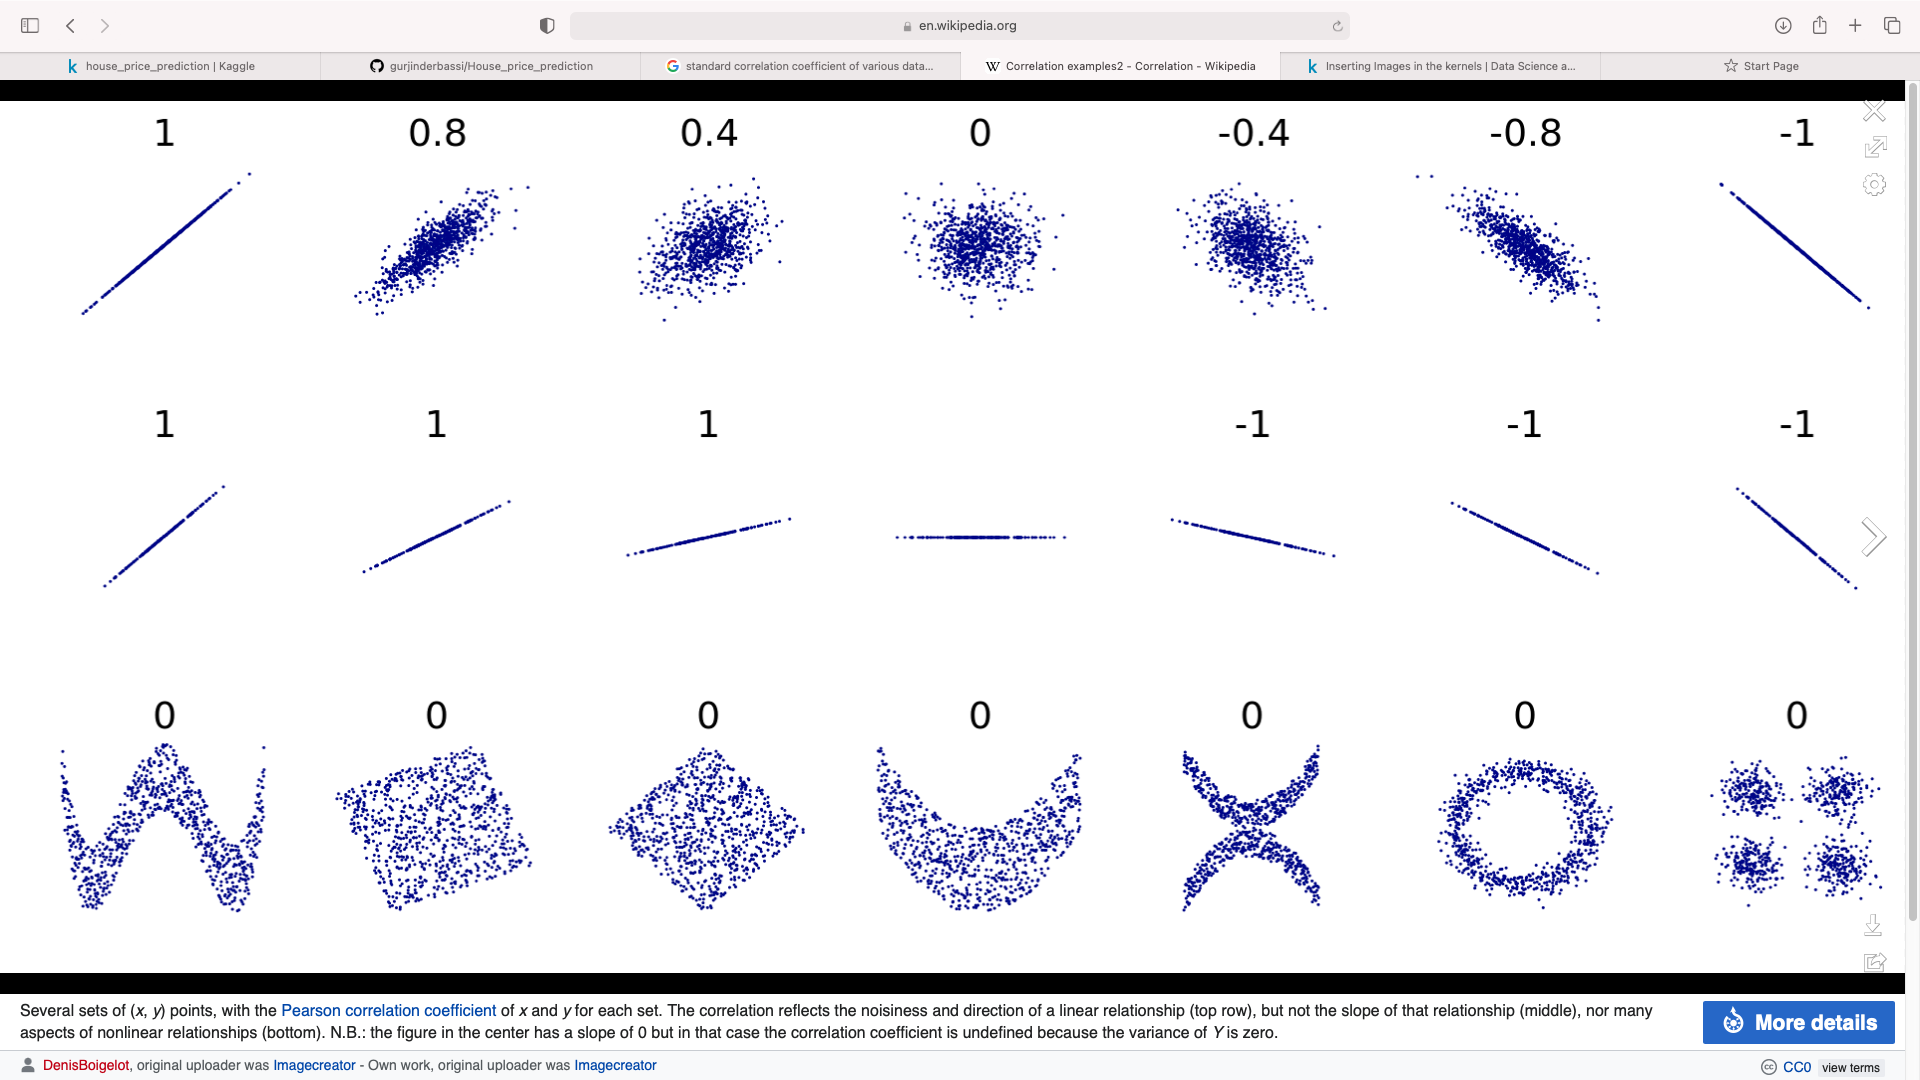

#### Important:
The correlation coefficient only measures linear correlations ('if x goes up, then generally y goes up/down'). It may completely miss out on non-linear relationships.
<br>
For example, in the bottom row in image above, all the data distributions have zero correlation coefficient despite the fact that their axes are clearly not indepdent. These are the examples of non-linear relationships that are not captured by the Pearson correlation coefficient.


#### Alternative way to check correlation: scatter_matrix()
One can also use Pandas' scatter_matrix function to get the correlation between attributes. It plots every numeric attribute against every other numeric attribute (in our case 9\*9 = 81 plots).

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='MedInc', ylabel='Price'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='Price'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='MedInc'>,
        <AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='Price', ylabel='AveRooms'>,
        <AxesSubplot:xlabel='MedInc', ylabel='AveRooms'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='AveRooms'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='AveRooms'>],
       [<AxesSubplot:xlabel='Price', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>]], dtype=object)

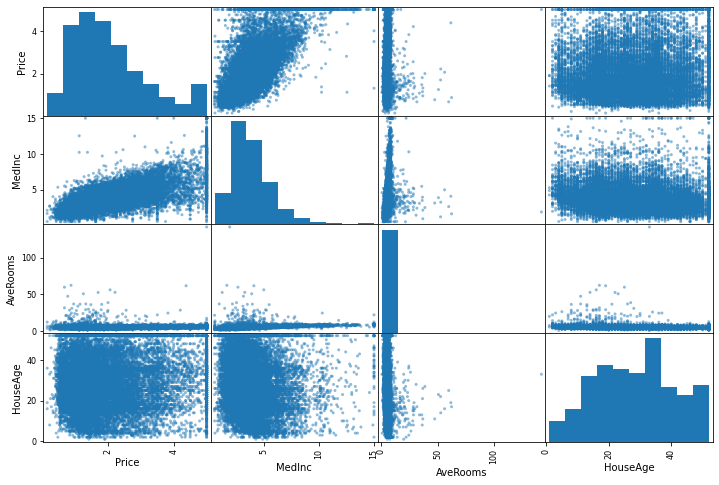

In [38]:
from pandas.plotting import scatter_matrix
attributes = ['Price','MedInc','AveRooms','HouseAge'] # select the important attributes for plotting purpose
scatter_matrix(df[attributes], figsize=(12,8))

The most promising attribute to predict the Price is the median income. We can zoom into the specific plot to observe it.

<AxesSubplot:xlabel='MedInc', ylabel='Price'>

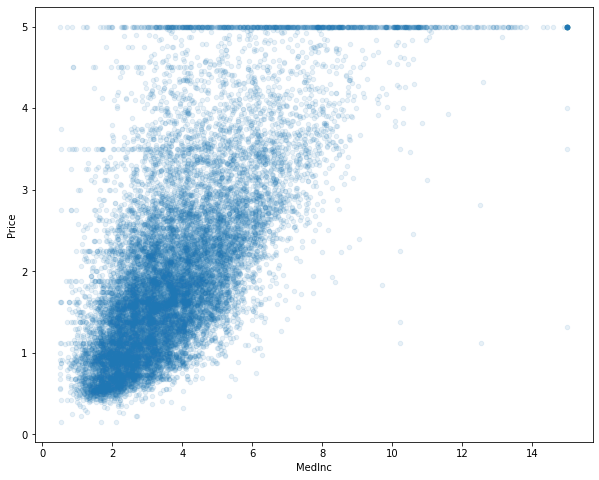

In [40]:
df.plot(kind='scatter', x='MedInc', y='Price', alpha=0.1, figsize=(10,8))

This plot tells us various things:
- The correlation is strong (we can see an upward trend and the points are not too dispersed).
- We can see some horizontal lines around $500,000, $450,000, $350,000 and one perhaps around $280,000. 
- We may want to try to remove the corresponding districts to prevent our algorithms from learning to reproduce these data quirks.

### Feature scaling
- Most ML algorithms don't perform well when the input numerical attributes have very different scales.
- Note: Scaling of the target values is generally not needed.
- Two common ways of scaling are *Standardization* and *min-max scaling (normalization)*.
- Standardization subtracts mean from each value and divide by standard deviation, doesn't force any boundaries for values, less affected by outliers.
- Min-max scaling subtracts the min value and divide by max minus the min, end up ranging between 0 and 1.

#### Important:
It is important to fit the scalers to the training data only, not to the full dataset. Only then, you can use them to transform the training set and test set (and new data).

#### But wait! What is the difference between fit() and transform()?
- Estimators are the objects that estimate some parameters based on a dataset, and the estimation is performed using fit() method.
- Transformers are some estimators that can also transform a dataset, the transformation is performed by the transform() method with the dataset to transform as input and it returns the transformed dataset. This transformation generally relies on the learned parameters.
- For convenience, we can use fit_transform() method that is equivalent to calling fit() and then transform().

### Transformation Pipelines
Sklearn provides the Pipeline class to help with executing sequence of transformations

In [68]:
housing = train_set.drop('Price',axis=1)
labels = train_set['Price'].copy()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('std_scaler',StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing)
housing_num_tr # it is an array now

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e. they must have a fit_transform() method). Names can be of your choice. 
- When you call the fit() method for pipeline, it calls fit_transform() for all transformers and only calls fit() method for the final estimator.

### Train a linear regression model

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()
lr.fit(housing_num_tr, labels)

LinearRegression()

In [63]:
some_data = housing.iloc[:5]
some_labels = labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)
print('Predictions: ',lr.predict(some_data_prepared))
print('Actual values: ',list( some_labels))

Predictions:  [1.93725845 2.48910616 2.64735483 1.56589492 1.61312839]
Actual values:  [1.03, 3.821, 1.726, 0.934, 0.965]


#### Measure the performance of the model
We can use Mean squared error to evaluate the performance of our linear regression model.
First we predict the prices for training dataset and then calculate the MSE using mean_squared_error() method of sklearn.
<br>
Don't touch the test set unless you are confident about the performance of your model on the training set.

In [64]:
from sklearn.metrics import mean_squared_error
housing_predictions = lr.predict(housing_num_tr)
lr_mse = mean_squared_error(labels, housing_predictions)
print(lr_mse)

0.5179331255246699


Most districts' Price (target variable) ranges from 0.4999 to 0.15, so a typical prediction error of 0.51 is not very satisfying. This is an example of model underfitting the training data which means that the features do not provide enough information to make good predictions, or the model is not powerful enough.
<br>
Some ways to prevent underfitting:
- select a more powerful model
- feed the training model with better features, do some intelligent feature engineering
- reduce the constraints on the model